In [103]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



paths = [r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R05.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R10.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R15.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R20.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R25.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R30.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R35.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R40.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R45.pkl",r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R50.pkl"]


In [104]:
data_list = []
for i in range(len(paths)):
    with open(paths[i], "rb") as file:
        data = pickle.load(file)
        data_list.append(data)
        


In [105]:
for i in range(len(data_list)):

    if "Signal number" in data_list[i].columns:

        data_list[i][['Base', 'Order']] = data_list[i]['Signal number'].str.split('.', expand=True).astype(int)
        
        data_sorted = data_list[i].sort_values(by=['Order'],ascending = True)

        data_sorted = data_sorted.drop(['Base', 'Order',"Signal number"], axis=1)


        data_list[i] = data_sorted
        



In [115]:
for i in range(len(data_list)):  
    data_list[i] = data_list[i].replace(0,np.nan)
    if data_list[i].shape[0] < 1000:
        data_list[i] = data_list[i].transpose()
   

temp_leng = []
temp_col = []

for i in range(len(data_list)):
   
    temp_leng.append(data_list[i].shape[0])
    temp_col.append(data_list[i].shape[1])
    
print(temp_leng)
print(temp_col)

# Rename columns in each DataFrame to avoid conflicts
for i, df in enumerate(data_list):
    a = i*5+5
    new_columns = []
    print(type(df.columns))
    for j in range(df.shape[1]):
        
        new_columns.append(f"R_{a}_{j}")
    data_list[i].columns = new_columns
    
print(data_list[3])

frames = [data_list[0], data_list[1],data_list[2],data_list[3],data_list[4],data_list[5],data_list[6],data_list[7],data_list[8],data_list[9]]

result = pd.concat(frames,axis=1)
print(result)


[2803, 2812, 2816, 2820, 2812, 2807, 2808, 2805, 2815, 2809]
[498, 499, 498, 501, 501, 501, 501, 501, 501, 499]
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
        R_20_0    R_20_1    R_20_2    R_20_3    R_20_4    R_20_5    R_20_6  \
0    -0.000168  0.001740  0.001419  0.001099  0.001755 -0.008484 -0.018707   
1    -0.000488  0.001099  0.001099  0.001099  0.001434 -0.008804 -0.018707   
2    -0.000168  0.000778  0.001099  0.001740  0.002701 -0.008484 -0.018387   
3    -0.000168  0.001099  0.001740  0.000778  0.001755 -0.008484 -0.019028   
4    -0.000809  0.001099  0.001099  0.001419  0.002060 -0.008163 -0.018066   
...       

In [122]:
# Define a function to replace NaNs with the row mean
def replace_nan_with_row_mean(row):
    # Calculate the mean, ignoring NaNs
    mean = row.mean()
    # Check if the mean is NaN (which happens if all values are NaN)
    if np.isnan(mean):
        # Optional: Define a default value for rows with all NaNs, or skip
        return row
    else:
        # Fill NaNs with the mean of the row
        return row.fillna(mean)
    
def replace_nan_with_column_mean(column):
    # Calculate the mean, ignoring NaNs
    mean = column.mean()
    # Check if the mean is NaN (which happens if all values are NaN)
    if np.isnan(mean):
        # Optional: Define a default value for rows with all NaNs, or skip
        return column
    else:
        # Fill NaNs with the mean of the row
        return column.fillna(mean)

# Apply the function across rows
result = result.apply(replace_nan_with_row_mean, axis=1)
#data = data.apply(replace_nan_with_column_mean, axis=0)



result = result.transpose()
print(result)

              0         1         2         3         4         5     \
R_5_0    -0.020309 -0.020630 -0.020950 -0.021576 -0.021271 -0.021912   
R_5_1    -0.020309 -0.019684 -0.019043 -0.019363 -0.019043 -0.018402   
R_5_2    -0.020309 -0.019348 -0.019348 -0.019989 -0.019669 -0.019669   
R_5_3    -0.020309 -0.019669 -0.020630 -0.020630 -0.020630 -0.020950   
R_5_4    -0.020309 -0.020935 -0.020309 -0.019974 -0.020615 -0.021255   
...            ...       ...       ...       ...       ...       ...   
R_50_494 -0.038193 -0.038193 -0.038513 -0.038513 -0.038193 -0.039154   
R_50_495 -0.039795 -0.039474 -0.038834 -0.039474 -0.039795 -0.039154   
R_50_496 -0.037888 -0.038528 -0.038208 -0.038528 -0.038528 -0.038528   
R_50_497 -0.040115 -0.040756 -0.040115 -0.040436 -0.040115 -0.040436   
R_50_498 -0.041077 -0.040436 -0.040436 -0.040436 -0.039474 -0.040436   

              6         7         8         9     ...      2810      2811  \
R_5_0    -0.021271 -0.021576 -0.020630 -0.020309  ...  0.0

In [17]:
# Save DataFrame to a pickle file
#df.to_pickle(r"C:\Users\topra\Desktop\Robust AI\Data\Extra\R10.pkl")

In [149]:

scaler=StandardScaler()

scaler.fit(result)
scaled_data=scaler.transform(result)
pca=PCA(n_components=20)

data_pca = pca.fit_transform(scaled_data)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print(exp_var_pca)
print(cum_sum_eigenvalues)

print(pca.n_features_in_)

print(data_pca.shape)



[0.45988155 0.34267577 0.09079031 0.02279712 0.01362505 0.0115453
 0.0091262  0.00614896 0.00422964 0.00395794 0.00352656 0.00249785
 0.00229388 0.00187956 0.00173231 0.00139686 0.00128392 0.00112604
 0.00102892 0.00094194]
[0.45988155 0.80255732 0.89334763 0.91614474 0.92976979 0.94131509
 0.95044129 0.95659025 0.96081989 0.96477784 0.9683044  0.97080225
 0.97309613 0.9749757  0.97670801 0.97810487 0.97938879 0.98051483
 0.98154375 0.98248569]
2820
(5000, 20)


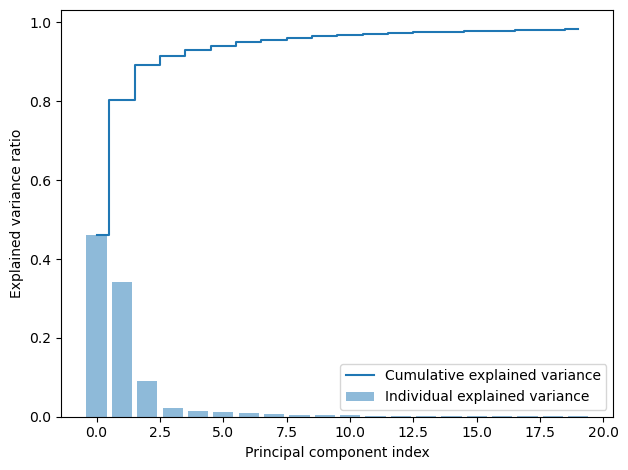

In [150]:

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


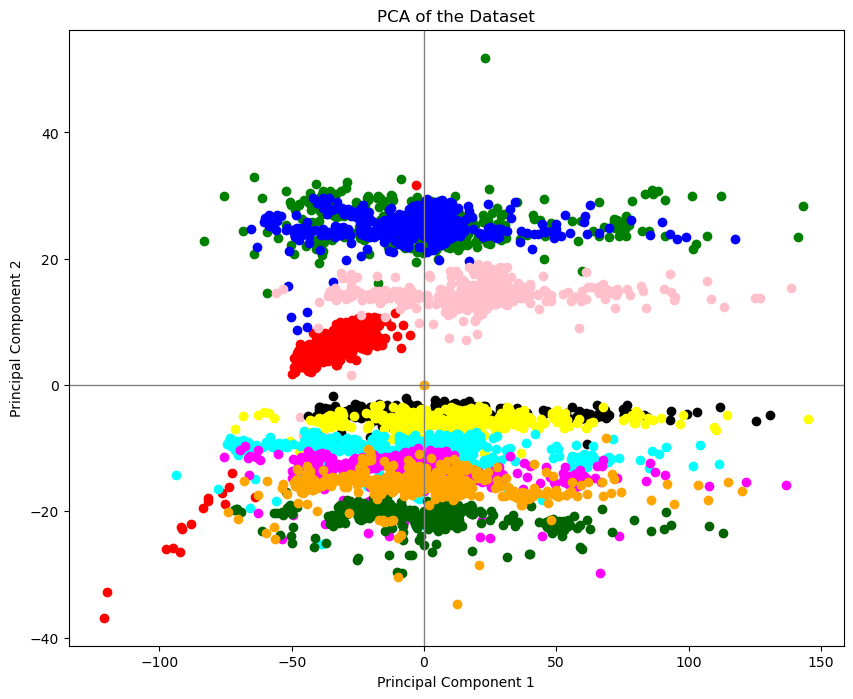

In [155]:
color = ["red","green","blue","pink","black","yellow","cyan","magenta","darkgreen","orange"]
plt.figure(figsize=(10, 8))
for i in range(len(data_list)):
    plt.scatter(data_pca[500*i:500*i + 500, 1], data_pca[500*i:500*i + 500, 2],color=color[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()
